In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="5"

In [2]:
import posixpath

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from scipy.ndimage import gaussian_filter

from tf_unet.inno_data import InnoH5
from tf_unet import unet

In [3]:
INPUT_SIZE = 572
IMG_H5 = "../data/images.h5"
AN_H5 = "../data/annotations.h5"

Images: 50
Images: 50


array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 1., 1.]])

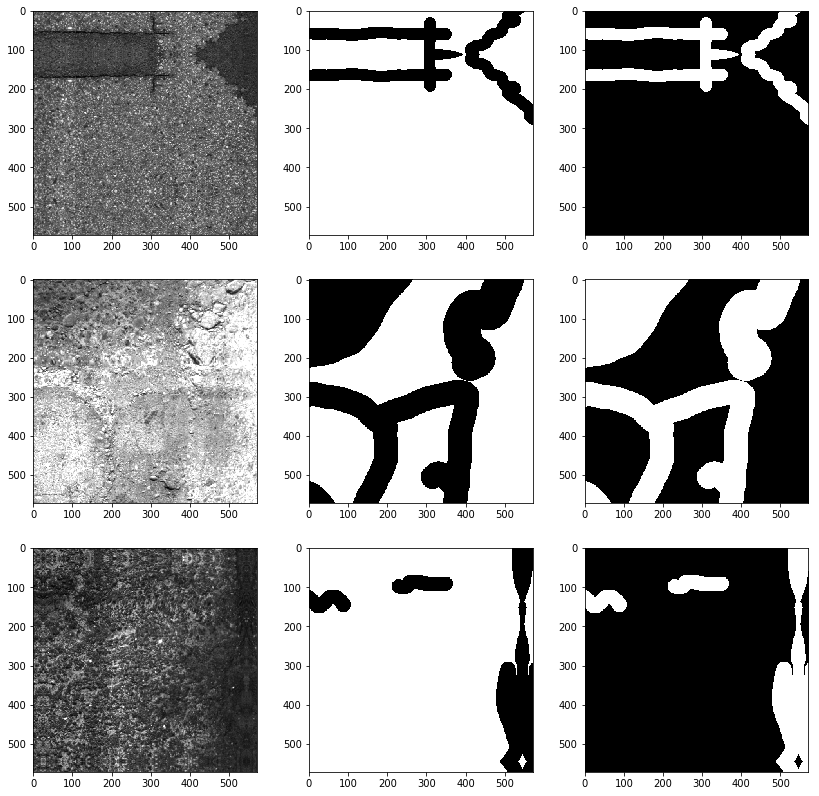

In [7]:
generator = InnoH5(INPUT_SIZE, IMG_H5, "df", AN_H5, "df")
image, label = generator(50)
print("Images: %d"% len(image))
print("Images: %d"% len(label))
fig, ax = plt.subplots(3,3, figsize=(14,14))
ax=np.ravel(ax)
ax[0].imshow(image[15, ..., 0], aspect="equal", cmap=plt.cm.gray)
ax[1].imshow(label[15, ..., 0], aspect="equal", cmap=plt.cm.gray)
ax[2].imshow(label[15, ..., 1], aspect="equal", cmap=plt.cm.gray)
ax[3].imshow(image[25, ..., 0], aspect="equal", cmap=plt.cm.gray)
ax[4].imshow(label[25, ..., 0], aspect="equal", cmap=plt.cm.gray)
ax[5].imshow(label[25, ..., 1], aspect="equal", cmap=plt.cm.gray)
ax[6].imshow(image[48, ..., 0], aspect="equal", cmap=plt.cm.gray)
ax[7].imshow(label[48, ..., 0], aspect="equal", cmap=plt.cm.gray)
ax[8].imshow(label[48, ..., 1], aspect="equal", cmap=plt.cm.gray)
# ax[6].imshow(image[3, ..., 0], aspect="equal", cmap=plt.cm.gray)
# ax[7].imshow(label[3, ..., 1], aspect="equal", cmap=plt.cm.gray)
  #plt.pause(3)
  #plt.draw()

In [8]:
net = unet.Unet(channels=generator.channels, 
                    n_class=generator.n_class, 
                    layers=5,
                    features_root=16,
                    summaries=True,
                    cost_kwargs={"class_weights": [0.15, 0.85]})

2018-12-04 14:28:46,910 Layers 5, features 16, filter size 3x3, pool size: 2x2


In [9]:
trainer = unet.Trainer(net,
                           optimizer="adam",
                           batch_size=10,
                           opt_kwargs=dict(learning_rate=0.001))

In [10]:
path = trainer.train(generator, "./unet_trained",
                         training_iters=10000,
                         epochs=10,
                         dropout=0.75,  # probability to keep units
                         display_step=25)

2018-12-04 14:28:58,594 Removing '/app/src/demo/prediction'
2018-12-04 14:28:58,598 Removing '/app/src/demo/unet_trained'
2018-12-04 14:28:58,599 Allocating '/app/src/demo/prediction'
2018-12-04 14:28:58,601 Allocating '/app/src/demo/unet_trained'
2018-12-04 14:29:05,604 Verification error= 71.3%, loss= 0.2401
2018-12-04 14:29:06,652 Start optimization
2018-12-04 14:29:14,223 Iter 0, Minibatch Loss= 0.2208, Training Accuracy= 0.2513, Minibatch error= 74.9%
2018-12-04 14:29:42,613 Iter 25, Minibatch Loss= 0.2101, Training Accuracy= 0.2525, Minibatch error= 74.7%
2018-12-04 14:30:12,090 Iter 50, Minibatch Loss= 0.1872, Training Accuracy= 0.1541, Minibatch error= 84.6%
2018-12-04 14:30:41,593 Iter 75, Minibatch Loss= 0.2116, Training Accuracy= 0.2752, Minibatch error= 72.5%
2018-12-04 14:31:11,277 Iter 100, Minibatch Loss= 0.2030, Training Accuracy= 0.2226, Minibatch error= 77.7%
2018-12-04 14:31:39,562 Iter 125, Minibatch Loss= 0.2103, Training Accuracy= 0.2433, Minibatch error= 75.7%
20

TypeError: float() argument must be a string or a number, not 'PngImageFile'